# 1.1 最小二乗法

$N$ を正の整数として，$N$ 個のサンプル $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_N)$　から線形回帰モデル：

$$
y = \beta_0 + \beta_1 x
$$

の係数を求めたい．ロスを

$$
L = \sum_{i=1}^{N} \left( y_i - \beta_0 - \beta_1 x_i \right)^2
$$

としたとき，$L$ の最小値を与える $\beta_0 = \hat{\beta}_0$ と $\beta_1 = \hat{\beta}_1$ はそれぞれ

$$
\hat{\beta}_1 = \cfrac{\sum_{i = 1}^{N} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i = 1}^{N} (x_i - \bar{x})^2}
$$
$$
\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}
$$

で与えらえれる．ここで，

$$
\bar{x} = \sum_{i = 1}^{N} x_i,\quad \bar{y} = \sum_{i = 1}^{N} y_i
$$

である．

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


class LinearRegression:
    def __init__(self, x: np.ndarray, y: np.ndarray):
        """
        Initialize the LinearRegression class with x and y data.

        Args:
            x (np.ndarray): Independent variable data.
            y (np.ndarray): Dependent variable data.
        """
        self.x = x
        self.y = y
        self.beta_1 = None
        self.beta_0 = None

    @staticmethod
    def generate_samples(
        num_samples: int = 1000, beta_1: float = 2, beta_0: float = 1
    ) -> np.ndarray:
        """
        Generate random samples from a regression model.
        y = beta_0 + beta_1 * x + e, where e is a normal error term.

        Args:
            num_samples (int): Number of samples to generate.
            beta_1 (float): Coefficient for x. Default is 2.
            beta_0 (float): Intercept. Default is 1.

        Returns:
            np.ndarray: Array of random samples.
        """
        x = np.linspace(-3, 3, num_samples)
        e = np.random.normal(loc=0, scale=1, size=num_samples)
        y = beta_0 + beta_1 * x + e
        return x, y

    def fit(self):
        """
        Fit the linear regression model to the data.
        Calculate beta_1 and beta_0 using the least squares method.
        """
        n = len(self.x)
        self.beta_1 = (
            n * np.sum(self.x * self.y) - np.sum(self.x) * np.sum(self.y)
        ) / (n * np.sum(self.x**2) - np.sum(self.x) ** 2)
        self.beta_0 = (np.sum(self.y) - self.beta_1 * np.sum(self.x)) / n

    def predict(self, x: np.ndarray) -> np.ndarray:
        """
        Predict the dependent variable using the fitted model.

        Args:
            x (np.ndarray): Independent variable data.

        Returns:
            np.ndarray: Predicted values.
        """
        if self.beta_1 is None or self.beta_0 is None:
            raise ValueError("Model is not fitted yet. Call fit() before predict().")
        return self.beta_0 + self.beta_1 * x

    def show_parameters(self):
        """
        Print the fitted parameters of the model.
        """
        if self.beta_1 is None or self.beta_0 is None:
            raise ValueError(
                "Model is not fitted yet. Call fit() before show_parameters()."
            )
        print(f"Fitted parameters: beta_0 = {self.beta_0}, beta_1 = {self.beta_1}")

    def plot(self):
        """
        Plot the original data and the fitted regression line.
        """
        plt.scatter(self.x, self.y, color="blue", label="Data points")
        x_range = np.linspace(np.min(self.x), np.max(self.x), 100)
        y_pred = self.predict(x_range)
        plt.plot(x_range, y_pred, color="red", label="Fitted line")
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Linear Regression Fit")
        plt.legend()
        plt.show()

Fitted parameters: beta_0 = 1.0483551390419596, beta_1 = 2.0056439008242526


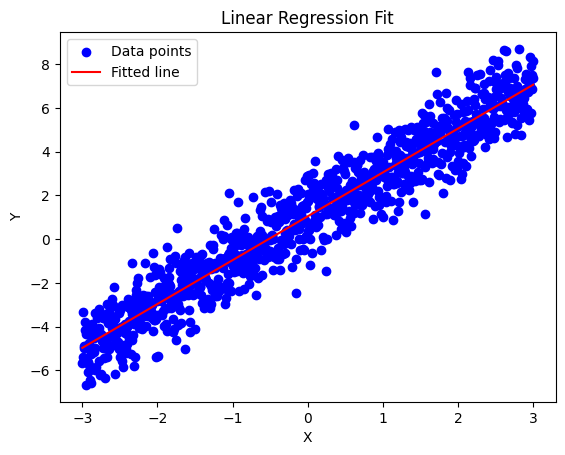

In [2]:
n_samples = 1000  # Number of samples
beta_1 = 2  # Slope of the line
beta_0 = 1  # Intercept of the line
x, y = LinearRegression.generate_samples(
    num_samples=n_samples, beta_1=beta_1, beta_0=beta_0
)  # Generate samples
model = LinearRegression(x, y)  # Create an instance of the LinearRegression class
model.fit()  # Estimate the parameters
model.show_parameters()  # Show the estimated parameters
model.plot()  # Plot the data and the fitted line